## Multi-Class Modeling using Train-Test-Split

In [1]:
# import packages needed for data handling 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns
sns.set(style="darkgrid")

# import packages to split the data 
from sklearn import model_selection
from sklearn.model_selection import train_test_split

# import models 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier  
from sklearn.svm import SVC
import xgboost as xgb

# import required packages for evaluating models
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import cross_val_score

In [2]:
# read in modeling data file
cols = ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10',
       'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20',
       'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30',
       'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40',
       'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'f50',
       'f51', 'f52', 'f53', 'f54', 'f55', 'f56', 'f57', 'f58', 'f59', 'f60',
       'f61', 'f62', 'f63', 'f64', 'f65', 'f66', 'f67', 'f68', 'f69', 'f70',
       'f71', 'f72', 'f73', 'f74', 'f75', 'f76', 'f77', 'Y1', 'Y2']

df = pd.read_csv('data/modeling.csv', header=0, names=cols)
df.head(2)

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f70,f71,f72,f73,f74,f75,f76,f77,Y1,Y2
0,-0.01821,-0.010433,-0.018399,-0.018279,-2.896385,-0.024231,-0.02066,4.079933,-1.414801,-3.011022,...,0,0,0,0,0,0,0,9.0,0,0
1,-0.01821,-3.182200,-3.260786,-3.270119,-2.037297,-0.024231,-0.02066,3.366161,-3.683655,-3.011022,...,0,0,0,0,0,0,0,9.0,0,0


In [3]:
df['Y']=df['Y1']+df['Y2']
df.head(2)

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f71,f72,f73,f74,f75,f76,f77,Y1,Y2,Y
0,-0.01821,-0.010433,-0.018399,-0.018279,-2.896385,-0.024231,-0.02066,4.079933,-1.414801,-3.011022,...,0,0,0,0,0,0,9.0,0,0,0
1,-0.01821,-3.182200,-3.260786,-3.270119,-2.037297,-0.024231,-0.02066,3.366161,-3.683655,-3.011022,...,0,0,0,0,0,0,9.0,0,0,0


In [4]:
df=df.drop(['Y1','Y2'],axis=1)
df[df.Y==1].head(2)
df.to_csv('data/multiclass_modeling.csv',index=0)

In [5]:
# Splitting up our data into features and targets
X = df.iloc[:, :-1] # Features
Y = df.Y # Target 

# Split dataset into training set and test set using a 70/30 split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=2019)

# import the RandomOverSampler package from imblearn
# this package will help address the imbalanced nature of the targets 
from imblearn.over_sampling import RandomOverSampler

# define the RandomOverSampler (ros) model
ros = RandomOverSampler(random_state=2019)

# fit the training data only to the RandomOverSampler model
X_train_resample, Y_train_resample = ros.fit_resample(X_train, Y_train)

/opt/tljh/user/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


## 1. Decision Tree

In [6]:
# build decision tree 
dt = DecisionTreeClassifier(random_state=2019)

# Train Decision Tree Classifer
dt = dt.fit(X_train_resample,Y_train_resample)

# Predict the target for the test data 
Y_pred = dt.predict(X_test)

In [7]:
# Model Accuracy, how often is the Decision Tree correct?
print("F1 Score:",metrics.f1_score(Y_test, Y_pred, average='weighted'))

# We are going to look at the classification report and also the confusion matrix for the Decision Tree  
print(metrics.classification_report(Y_test, Y_pred))
print(metrics.confusion_matrix(Y_test, Y_pred))

F1 Score: 0.7750283953721373
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      5612
           1       0.83      0.80      0.81      8692
           2       0.16      0.19      0.17      1532

    accuracy                           0.77     15836
   macro avg       0.62      0.62      0.62     15836
weighted avg       0.78      0.77      0.78     15836

[[4946  397  269]
 [ 453 6923 1316]
 [ 195 1044  293]]


In [8]:
# define the feature importance variable 
feature_imp = pd.Series(dt.feature_importances_,index=df.iloc[:,:-1].columns).sort_values(ascending=False)

# print the results 
feature_imp

f13    0.249884
f4     0.121741
f23    0.106666
f3     0.055055
f0     0.041641
f1     0.038000
f2     0.036830
f24    0.029938
f25    0.028849
f77    0.027980
f9     0.017194
f12    0.017138
f16    0.015297
f17    0.015168
f8     0.014115
f11    0.014065
f21    0.012453
f10    0.012053
f32    0.010785
f7     0.010269
f74    0.010220
f19    0.007851
f31    0.007662
f20    0.005993
f55    0.005949
f64    0.005761
f26    0.005463
f59    0.005195
f45    0.004871
f34    0.004787
         ...   
f49    0.001341
f37    0.001266
f73    0.001193
f42    0.001120
f53    0.001076
f76    0.000803
f72    0.000702
f68    0.000682
f71    0.000557
f69    0.000538
f58    0.000498
f35    0.000460
f66    0.000430
f61    0.000383
f41    0.000378
f46    0.000365
f27    0.000326
f38    0.000288
f70    0.000266
f60    0.000240
f43    0.000240
f63    0.000192
f28    0.000191
f65    0.000147
f52    0.000081
f67    0.000054
f22    0.000000
f47    0.000000
f6     0.000000
f5     0.000000
Length: 78, dtype: float

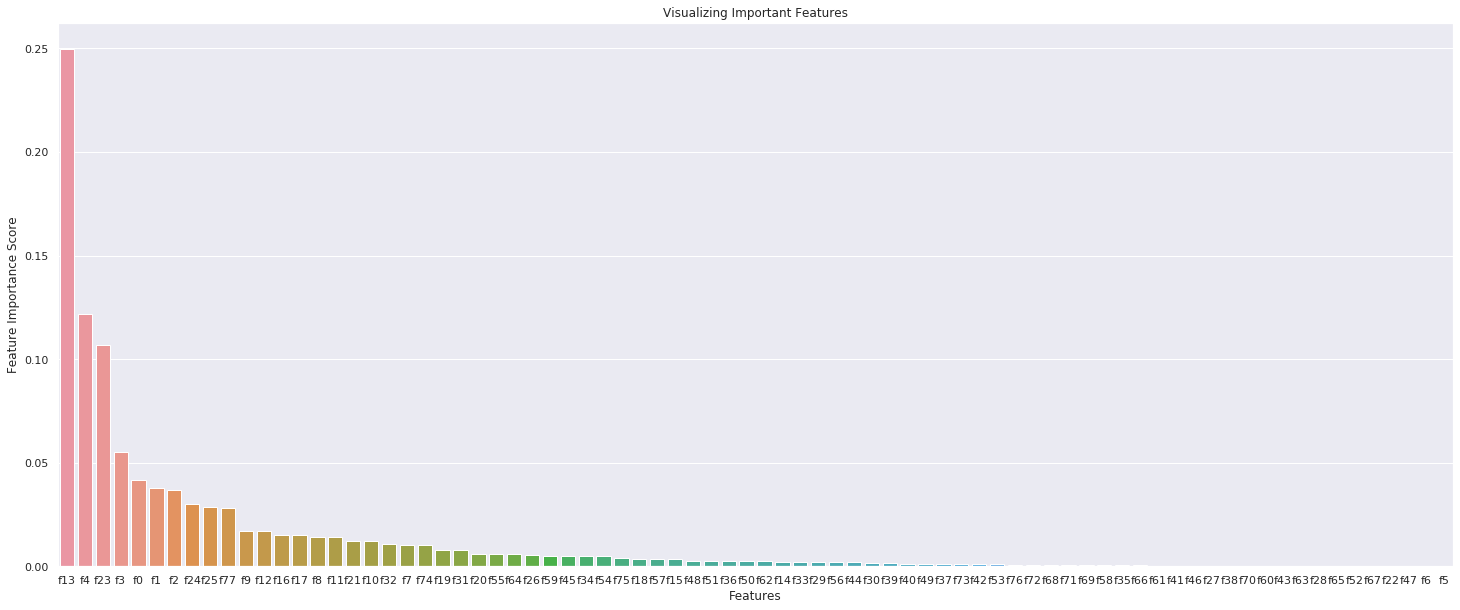

In [9]:
# visualize the feature importance values 
plt.figure(figsize=(25,10))

# Creating a bar plot
sns.barplot(x=feature_imp.index, y=feature_imp)

# Add labels
plt.ylabel('Feature Importance Score')
plt.xlabel('Features')
plt.title("Visualizing Important Features")

plt.show()

## 2. SVM

In [10]:
# define the svm model 
svc = SVC(kernel='rbf', gamma='auto', random_state=2019)

# fit svm model 
svc = svc.fit(X_train_resample, Y_train_resample)

# predict the target using the testing data 
Y_pred = svc.predict(X_test)

In [11]:
# Model Accuracy, how often is the Decision Tree correct?
print("F1 Score:",metrics.f1_score(Y_test, Y_pred, average='weighted'))

# We are going to look at the classification report and also the confusion matrix for the Decision Tree  
print(metrics.classification_report(Y_test, Y_pred))
print(metrics.confusion_matrix(Y_test, Y_pred))

F1 Score: 0.7632018452830728
              precision    recall  f1-score   support

           0       0.92      0.91      0.91      5612
           1       0.87      0.66      0.75      8692
           2       0.20      0.48      0.29      1532

    accuracy                           0.73     15836
   macro avg       0.66      0.68      0.65     15836
weighted avg       0.82      0.73      0.76     15836

[[5090  265  257]
 [ 287 5764 2641]
 [ 173  622  737]]


### 3. KNeighbors

In [ ]:
# define the svm model 
kn = KNeighborsClassifier()

# fit svm model 
kn = kn.fit(X_train_resample, Y_train_resample)

# predict the target using the testing data 
Y_pred = kn.predict(X_test)

In [ ]:
# Model Accuracy, how often is the Decision Tree correct?
print("F1 Score:",metrics.f1_score(Y_test, Y_pred, average='weighted'))

# We are going to look at the classification report and also the confusion matrix for the Decision Tree  
print(metrics.classification_report(Y_test, Y_pred))
print(metrics.confusion_matrix(Y_test, Y_pred))

### 4. AdaBoost

In [ ]:
# define the svm model 
ada = AdaBoostClassifier(random_state=2019)

# fit svm model 
ada = ada.fit(X_train_resample, Y_train_resample)

# predict the target using the testing data 
Y_pred = ada.predict(X_test)

In [ ]:
# Model Accuracy, how often is the Decision Tree correct?
print("F1 Score:",metrics.f1_score(Y_test, Y_pred, average='weighted'))

# We are going to look at the classification report and also the confusion matrix for the Decision Tree  
print(metrics.classification_report(Y_test, Y_pred))
print(metrics.confusion_matrix(Y_test, Y_pred))

### 5. XGBoost

In [12]:
# build xgboost model
xg = xgb.XGBClassifier(n_estimators=100, random_state=2019)

# fit the training data to the model
xg = xg.fit(X_train_resample,Y_train_resample) 

# run the model using test data 
Y_pred=xg.predict(X_test)

In [13]:
# evluate xgboost
print("F1 Score:",metrics.f1_score(Y_test, Y_pred, average='weighted'))

# We are going to look at the classification report and also the confusion matrix for the Decision Tree  
print(metrics.classification_report(Y_test, Y_pred))
print(metrics.confusion_matrix(Y_test, Y_pred))

F1 Score: 0.7632550411392073
              precision    recall  f1-score   support

           0       0.91      0.92      0.91      5612
           1       0.87      0.66      0.75      8692
           2       0.20      0.46      0.28      1532

    accuracy                           0.73     15836
   macro avg       0.66      0.68      0.65     15836
weighted avg       0.82      0.73      0.76     15836

[[5163  238  211]
 [ 328 5745 2619]
 [ 186  634  712]]


In [ ]:
# visualize the feature importances according to the xgboost model
xgb.plot_importance(xg)
plt.rcParams['figure.figsize'] = [20, 10]
plt.show()

## 6. Random Forest

In [ ]:
# build decision tree 
rf = RandomForestClassifier(n_estimators=100, random_state=2019)

# Train Decision Tree Classifer
rf = rf.fit(X_train_resample, Y_train_resample)

# Predict the target for the test data 
Y_pred = rf.predict(X_test)

In [ ]:
# Model Accuracy, how often is the Decision Tree correct?
print("F1 Score:",metrics.f1_score(Y_test, Y_pred, average='weighted'))

# We are going to look at the classification report and also the confusion matrix for the Decision Tree  
print(metrics.classification_report(Y_test, Y_pred))
print(metrics.confusion_matrix(Y_test, Y_pred))